In [23]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
import warnings
import yfinance as yf
import statsmodels.api as sm
import math
import seaborn as sns
import time 
import random
from scipy.interpolate import LSQUnivariateSpline as Spline
import pandas as pd

In [2]:
%run datafunctions_AV.py

In [9]:
df = pd.read_csv("data_2_23_25.csv", index_col = 0)

In [10]:
df.head()

,Date,Open,High,Low,Close,Volume,daten,timedif,dups,drop,...,GLD_bsev5p,GLD_bsev5n,GLD_closevar,GLD_volvar,GLD_pclosevar,GLD_pvolvar,GLD_p2volvar,GLD_p2closevar,GLD_pvolvarchg,GLD_pclosevarchg
0,2012-01-09,425.5001,427.75,421.350,421.730,14072300.0,15348.0,0,0.0,keep,...,0,0,0.000041,0.030902,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-23,422.6700,428.45,422.300,427.409,10930800.0,15362.0,14,14.0,keep,...,0,0,0.000157,1.021087,0.000041,0.030902,NaN,NaN,NaN,NaN
2,2012-02-06,458.3800,464.98,458.201,463.970,8907600.0,15376.0,28,28.0,keep,...,0,0,0.000042,0.147284,0.000157,1.021087,0.030902,0.000041,32.042675,2.868794
3,2012-02-17,503.1100,507.77,500.300,502.120,19135900.0,15387.0,42,42.0,keep,...,0,0,0.000470,0.972911,0.000042,0.147284,1.021087,0.000157,-0.855758,-0.730315
4,2012-03-05,545.4200,547.48,526.000,533.160,28897300.0,15404.0,56,56.0,keep,...,0,0,0.000127,0.584637,0.000470,0.972911,0.147284,0.000042,5.605695,10.115416


In [19]:
df.shape

(24000, 265)

In [13]:
dev = df[df['timedif'] <= 3640]
val = df[df['timedif'] > 3640]

In [15]:
dev.shape

(18270, 265)

In [17]:
val.shape

(5730, 265)

In [21]:
tobin = [
    'DaysTilEarn', 
    'pchg',
    'pclosevar',
    'pclosevarchg',
    'pvolvar',
    'pvolvarchg',
    'p1sev5p', 
    'p2sev5p', 
    'p1sev5n', 
    'p2sev5n', 
    'SPY_pclosevarchg', 
    'SPY_pvolvarchg',
    'SPY_pclosevar', 
    'SPY_pvolvar',
    'SPY_pchg',
    'VIXY_pclosevarchg', 
    'VIXY_pvolvarchg',
    'VIXY_pclosevar', 
    'VIXY_pvolvar',
    'VIXY_pchg',
    'GLD_pclosevarchg', 
    'GLD_pvolvarchg',
    'GLD_pclosevar', 
    'GLD_pvolvar',
    'GLD_pchg',
    'USO_pclosevarchg', 
    'USO_pvolvarchg',
    'USO_pclosevar', 
    'USO_pvolvar',
    'USO_pchg',
]

for item in tobin:
    name = 'b' + item
    dev[name] = binner(dev[item])
    val[name] = binner(val[item])

towoe = [
    'bDaysTilEarn', 
    'bpchg',
    'bpclosevar',
    'bpclosevarchg',
    'bpvolvar',
    'bpvolvarchg', 
    'bp1sev5p', 
    'bp2sev5p', 
    'bp1sev5n', 
    'bp2sev5n', 
    'bSPY_pclosevarchg', 
    'bSPY_pvolvarchg',
    'bSPY_pclosevar', 
    'bSPY_pvolvar',
    'bSPY_pchg',
    'bVIXY_pclosevarchg', 
    'bVIXY_pvolvarchg',
    'bVIXY_pclosevar', 
    'bVIXY_pvolvar',
    'bVIXY_pchg',
    'bGLD_pclosevarchg', 
    'bGLD_pvolvarchg',
    'bGLD_pclosevar', 
    'bGLD_pvolvar',
    'bGLD_pchg',
    'bUSO_pclosevarchg', 
    'bUSO_pvolvarchg',
    'bUSO_pclosevar', 
    'bUSO_pvolvar',
    'bUSO_pchg',
]

for item in towoe:
    name = 'w' + item
    dev[name] = woe_calc(dev[item], dev['bsev5p'])
    val[name] = woe_calc(val[item], val['bsev5p'])

C:\Users\johns\AppData\Local\Temp\ipykernel_19472\2445696841.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev[name] = binner(dev[item])
C:\Users\johns\AppData\Local\Temp\ipykernel_19472\2445696841.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val[name] = binner(val[item])
C:\Users\johns\AppData\Local\Temp\ipykernel_19472\2445696841.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [33]:
df_no_nan = dev.dropna()

In [35]:
df_no_nan.shape

(18060, 325)

In [98]:
#df_no_nan = dev.dropna()
X = df_no_nan[['wbDaysTilEarn', 
               'wbpchg', 
               'wbpclosevar', 
               'wbpvolvarchg',
               'p1sev5n', 
               #'p2sev5n', 
               'p6wkclaimsp',
               'p6wkclaimsn',
               'wbSPY_pclosevarchg', 
               'wbSPY_pclosevar', 
               'wbSPY_pvolvarchg',
               'wbGLD_pvolvar',
               'wbVIXY_pvolvar',
               'wbVIXY_pchg',
               'wbUSO_pclosevar',
               'wbUSO_pvolvar',
              ]]
y = np.array(df_no_nan['bsev5p'])

X = sm.add_constant(X)
mod = sm.GLM(y,X, family = sm.families.Tweedie(var_power = 1.15))

results = mod.fit()

print("AIC is:", np.round(results.aic, 2))
print(results.summary())

AIC is: 17635.92
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                18060
Model:                            GLM   Df Residuals:                    18044
Model Family:                 Tweedie   Df Model:                           15
Link Function:                    Log   Scale:                          1.9070
Method:                          IRLS   Log-Likelihood:                -8802.0
Date:                Wed, 26 Feb 2025   Deviance:                       17269.
Time:                        23:16:43   Pearson chi2:                 3.44e+04
No. Iterations:                    11   Pseudo R-squ. (CS):            0.07559
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              

# PREDICTIONS

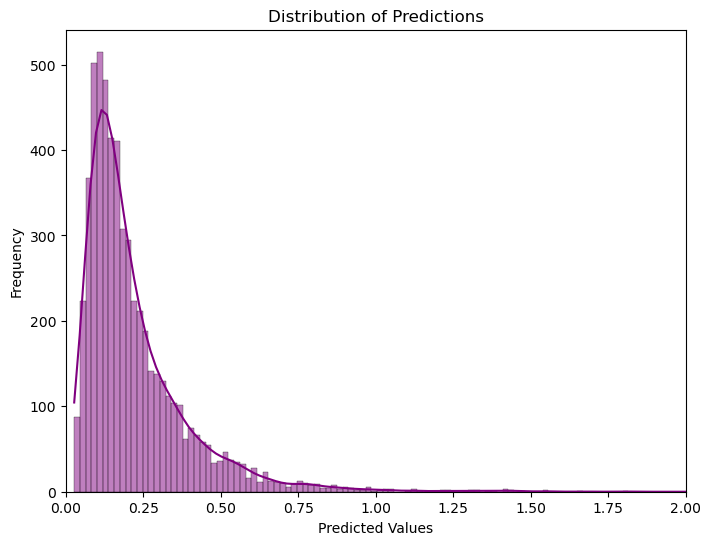

In [103]:
df_no_nanv = val.dropna()
X = df_no_nanv[['wbDaysTilEarn', 
               'wbpchg', 
               'wbpclosevar', 
               'wbpvolvarchg',
               'p1sev5n', 
               #'p2sev5n', 
               'p6wkclaimsp',
               'p6wkclaimsn',
               'wbSPY_pclosevarchg', 
               'wbSPY_pclosevar', 
               'wbSPY_pvolvarchg',
               'wbGLD_pvolvar',
               'wbVIXY_pvolvar',
               'wbVIXY_pchg',
               'wbUSO_pclosevar',
               'wbUSO_pvolvar',
              ]]
y = np.array(df_no_nanv['bsev5p'])
X = sm.add_constant(X)

predictions = results.predict(X)

# Plot distribution of predictions
plt.figure(figsize=(8, 6))
sns.histplot(predictions, kde=True, color='purple')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions')
plt.xlim(0, 2)
plt.show()

In [105]:
predictions_df = pd.DataFrame(predictions, columns=['Predictions'])
dfwpreds = pd.concat([df_no_nanv, predictions_df], axis=1)

In [107]:
# Create a new categorical column for the groups
#dfwpreds['SevGroups'] = dfwpreds['sev5p'].apply(sevgroups2)
dfwpreds['SevGroups'] = dfwpreds['bsev5p']
dfwpreds = dfwpreds.sort_values('SevGroups')

# Count observations per group
group_counts = dfwpreds['SevGroups'].value_counts().sort_index()

group_counts

0    4720
1     574
2     281
3     155
Name: SevGroups, dtype: int64

In [124]:
perc0 = group_counts[0]/group_counts.sum()
print(perc0)
perc1 = group_counts[1]/group_counts.sum()
print(perc1)
perc2 = group_counts[2]/group_counts.sum()
print(perc2)
perc3 = group_counts[3]/group_counts.sum()
print(perc3)

percs = [0, perc0, perc0+perc1, perc0+perc1+perc2, perc0+perc1+perc2+perc3]

dfwpreds['Rank'] = pd.qcut(dfwpreds['Predictions'], q=percs, labels=False)

dfwpreds[['Predictions', 'Rank', 'bsev5p']].head(20)

0.8237347294938918
0.10017452006980802
0.04904013961605585
0.027050610820244327


,Predictions,Rank,bsev5p
261,0.127853,0.0,0
15404,0.152788,0.0,0
15403,0.092901,0.0,0
15402,0.113559,0.0,0
15401,0.049500,0.0,0
15400,0.327533,0.0,0
15399,0.172909,0.0,0
15398,0.262810,0.0,0
15405,0.097456,0.0,0
15397,0.139424,0.0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


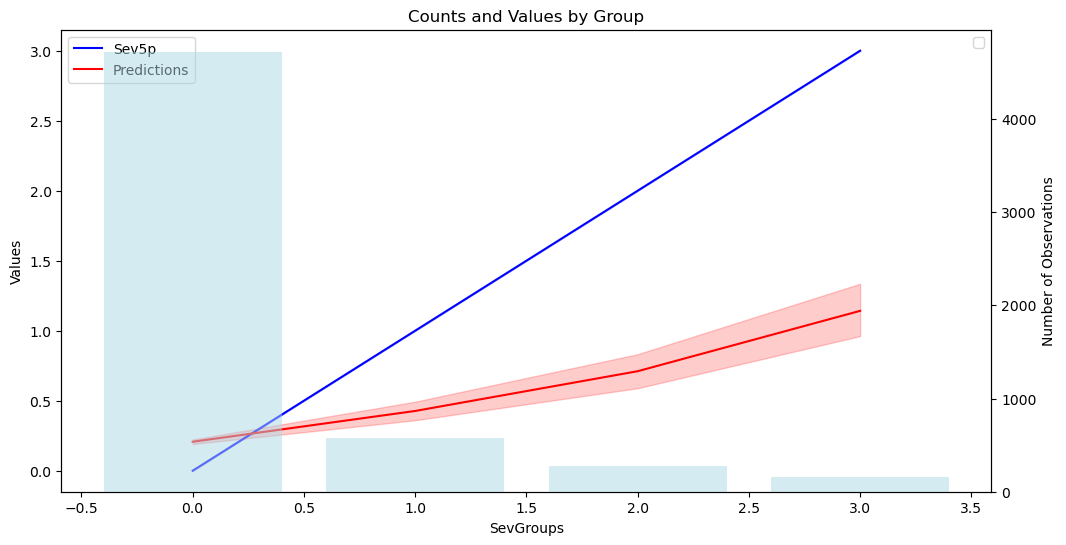

In [111]:
# Create subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot "change" values as a line graph on the left y-axis
order = ['0', '<=0.04', '<=0.08', '>0.08']
sns.lineplot(x='SevGroups', y='SevGroups', data=dfwpreds, sort=False, color='blue', ax=ax1, label='Sev5p')
sns.lineplot(x='SevGroups', y='Rank', data=dfwpreds, sort=False, color='red', ax=ax1, label='Predictions')

ax1.set_ylabel('Values')
ax1.set_title('Counts and Values by Group')

# Create a secondary y-axis for the counts of observations per group
ax2 = ax1.twinx()
ax2.bar(group_counts.index, group_counts.values, color='lightblue', alpha=0.5)
ax2.set_ylabel('Number of Observations')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [112]:
acc = calculate_bin_accuracy(dfwpreds, 'Rank', 'bsev5p')

Accuracy for bin 0: 0.86
Accuracy for bin 1: 0.16
Accuracy for bin 2: 0.11
Accuracy for bin 3: 0.19


In [113]:
dfwpreds[['Rank', 'bsev5p']][dfwpreds['Rank']==3].value_counts(normalize=True)

Rank  bsev5p
3.0   0         0.448052
      3         0.194805
      2         0.188312
      1         0.168831
dtype: float64

In [117]:
dfwpreds[['Rank', 'bsev5p']][dfwpreds['Rank']==2].value_counts(normalize=True)

Rank  bsev5p
2.0   0         0.658363
      1         0.135231
      2         0.110320
      3         0.096085
dtype: float64

In [119]:
dfwpreds[['Rank', 'bsev5p']][dfwpreds['Rank']==1].value_counts(normalize=True)

Rank  bsev5p
1.0   0         0.696864
      1         0.158537
      2         0.087108
      3         0.057491
dtype: float64

In [121]:
dfwpreds[['Rank', 'bsev5p']][dfwpreds['Rank']==0].value_counts(normalize=True)

Rank  bsev5p
0.0   0         0.861441
      1         0.088771
      2         0.036017
      3         0.013771
dtype: float64

In [136]:
dfwpreds[['Predictions', 'Rank', 'bsev5p']][dfwpreds['Rank']==3]

,Predictions,Rank,bsev5p
15706,1.310241,3.0,0
15721,0.815976,3.0,0
14671,0.900379,3.0,0
15020,0.674930,3.0,0
17078,1.354311,3.0,0
...,...,...,...
1987,0.878694,3.0,3
2001,0.835463,3.0,3
5432,0.898539,3.0,3
20508,0.851687,3.0,3
